In [55]:
# Challenge 4

In [56]:
# Initialize imports
import csv 
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

In [57]:
# Set .csv file paths & Import data
whale_returns = Path("./Resources/whale_returns.csv")
algo_returns = Path("./Resources/algo_returns.csv")
sp500_history = Path("./Resources/sp500_history.csv")

In [58]:
# Load CSV data into Pandas using read_csv/ Index by date
whale_df = pd.read_csv(whale_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(algo_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_history, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [59]:
# Whale: Search for nulls & data types
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [60]:
# Whale: Shape
whale_df.shape

(1060, 4)

In [61]:
# Whale: Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [62]:
# Algo: Search for nulls & data types
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [63]:
# Algo: Shape
algo_df.shape

(1241, 2)

In [64]:
# Algo: Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [65]:
# Sp500: Search for nulls & data types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [66]:
# Sp500: Shape
sp500_df.shape

(1649, 1)

In [67]:
# Sp500: Count nulls
sp500_df.isna().sum()

Close    0
dtype: int64

In [68]:
# Drop nulls (For All)
whale_df=whale_df.dropna()
algo_df=algo_df.dropna()
sp500_df=sp500_df.dropna()

In [69]:
# Display verification for null removal
# display(whale_df)
# display(algo_df)
# display(sp500_df)

In [70]:
# Conform sp500_history 'Close' column 
sp500_df["Close"] = sp500_df["Close"].str.replace("$","",regex=False)
sp500_df["Close"] = sp500_df["Close"].str.replace(",","")
sp500_df["Close"] = sp500_df["Close"].astype(float)

In [71]:
# Convert Sp500 'Close' daily return and data type
sp500_df = sp500_df.pct_change().dropna()
display(sp500_df)

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [72]:
# Concatenate portfolios into one DataFrame & Convert S&P500 column heading
merged_portfolio_df = pd.concat([whale_df, algo_df,sp500_df], axis='columns', join='inner').rename(columns={'Close': 'S&P500'})
merged_portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

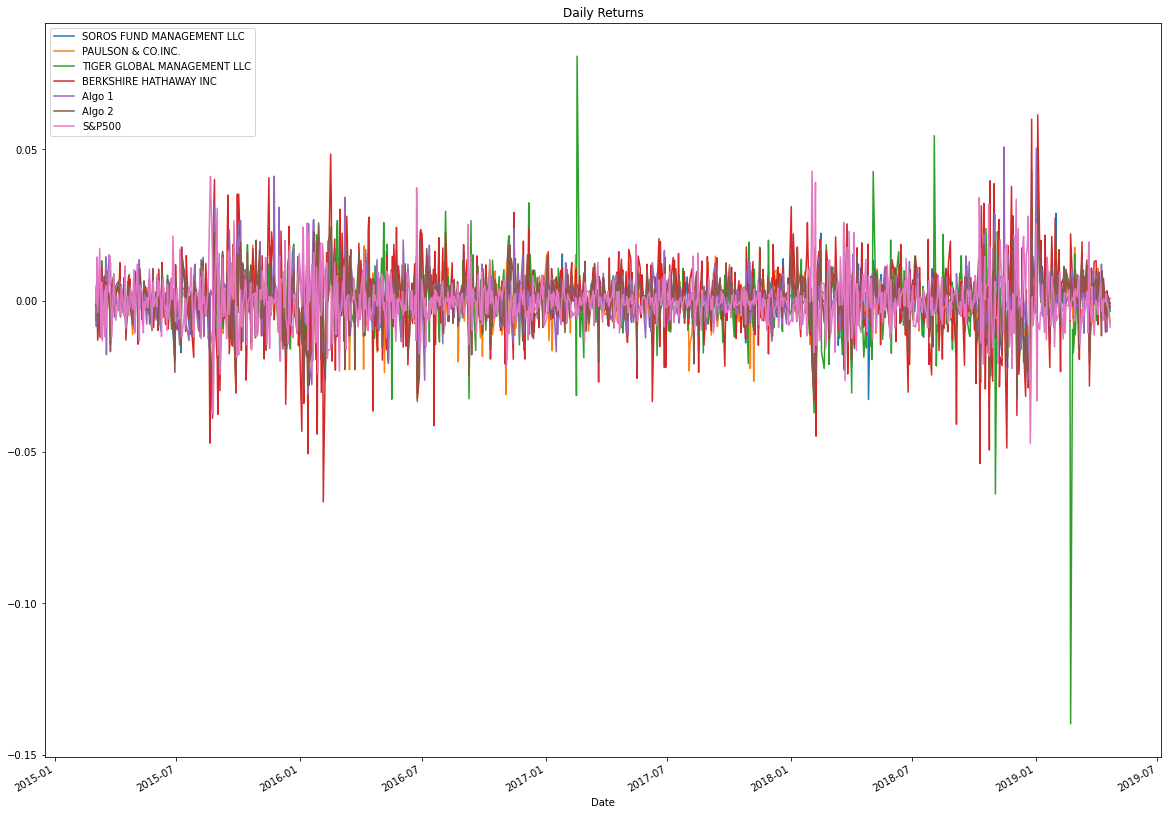

In [73]:
# Performance Analysis- Daily Returns of all portfolios: Scatter Plot
merged_portfolio_df.plot(title='Daily Returns', figsize=(20,15))

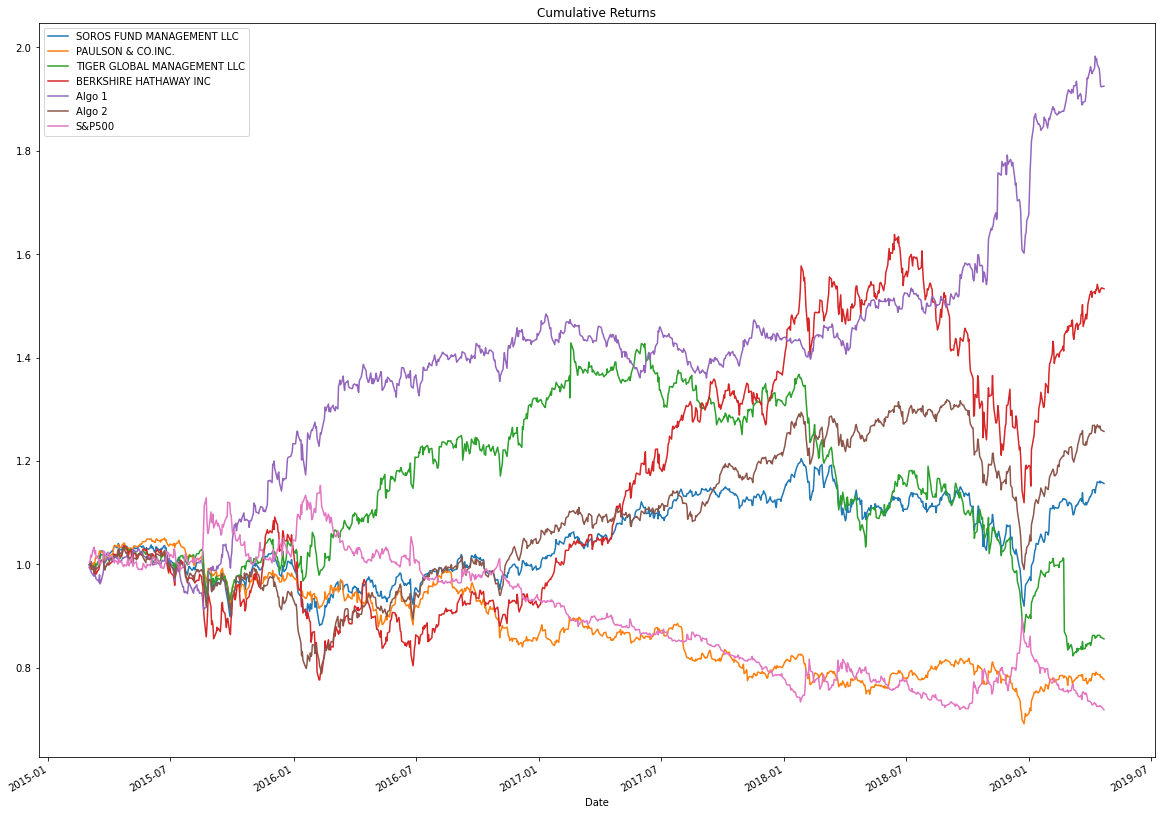

In [74]:
# Performance Analysis- Cumulative returns of all portfolios
cumulative_return = (1+merged_portfolio_df).cumprod()
cumulative_return.plot(title='Cumulative Returns', figsize=(20,15));

In [75]:
# Risk Analysis:

<AxesSubplot:title={'center':'Merged Box Plot'}>

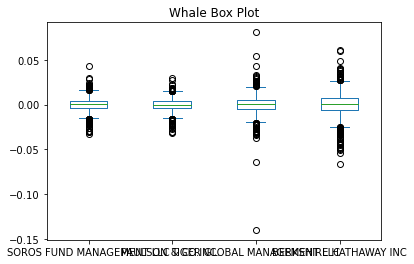

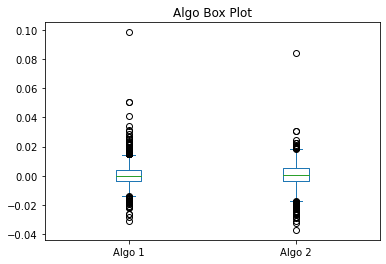

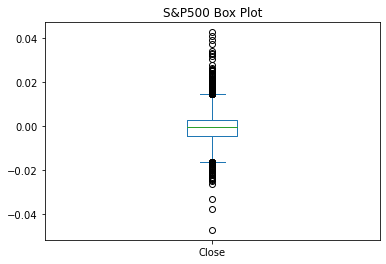

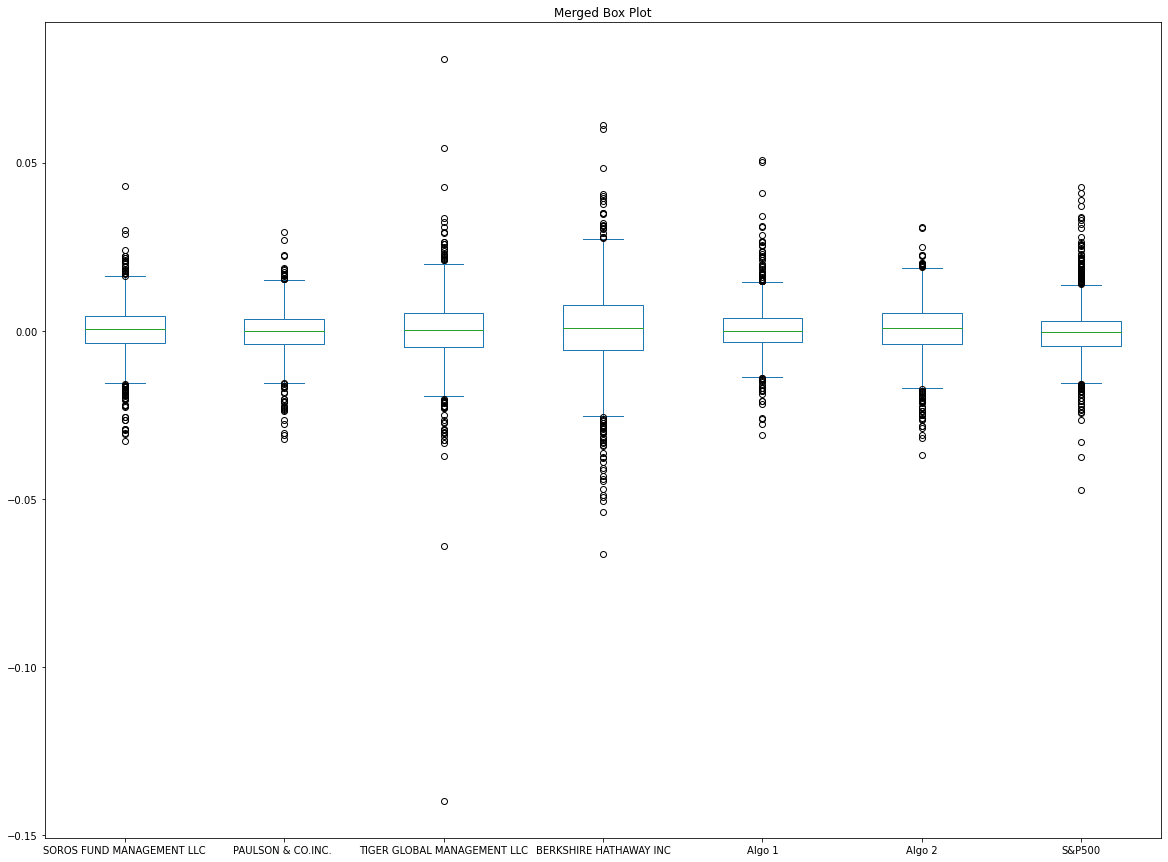

In [76]:
# Standard Deviation Box Plot
whale_df.plot.box(title='Whale Box Plot')
algo_df.plot.box(title='Algo Box Plot')
sp500_df.plot.box(title='S&P500 Box Plot')
merged_portfolio_df.plot.box(title='Merged Box Plot', figsize=(20,15))

In [77]:
# Calculate the daily standard deviations of all portfolios- [Descending Order]
daily_std = merged_portfolio_df.std()
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

<AxesSubplot:title={'center':'Daily Standard Deviations'}>

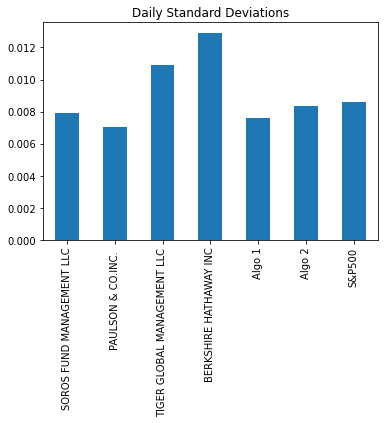

In [78]:
# Bar plot of the daily standard deviations
daily_std.plot.bar(title='Daily Standard Deviations')

In [79]:
# Calculate the annualized standard deviation (252 trading days)- [Descending Order]
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

<AxesSubplot:title={'center':'Annualized Standard Deviations- 252 Trading Days'}>

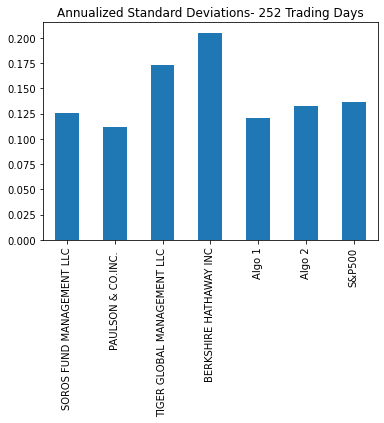

In [80]:
# Bar plot of the annualized standard deviation (252 trading days)
annualized_std.plot.bar(title='Annualized Standard Deviations- 252 Trading Days')

In [81]:
# Determine which portfolios are riskier than the S&P 500
# Add conditional statement to determine

In [82]:
# Rolling Statistics:

<AxesSubplot:title={'center':'Rolling Standard Deviations (Whale)- 21 Trading Days'}, xlabel='Date'>

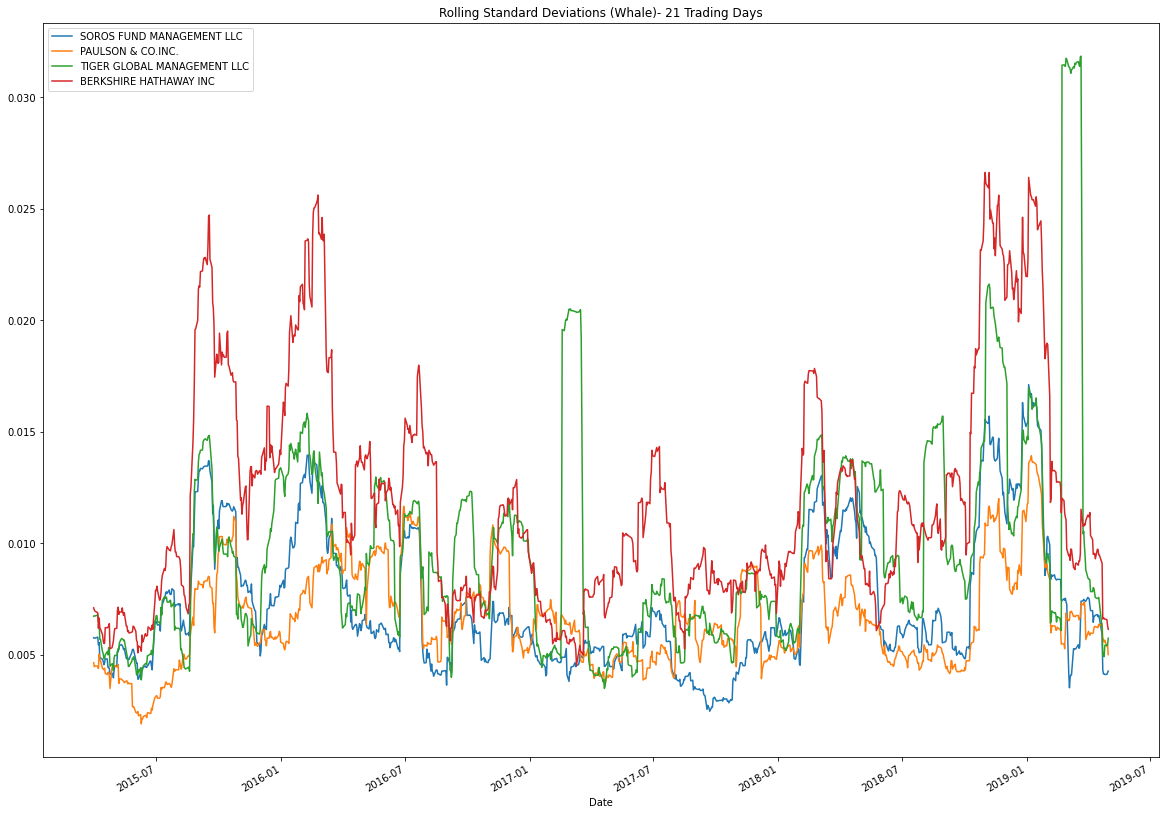

In [83]:
# Calculate the rolling standard deviation for whale portfolio using a 21-day window
whale_std21 = whale_df.rolling(21).std()
whale_std21.plot(title='Rolling Standard Deviations (Whale)- 21 Trading Days', figsize=(20,15))

<AxesSubplot:title={'center':'Rolling Standard Deviations (Algo)- 21 Trading Days'}, xlabel='Date'>

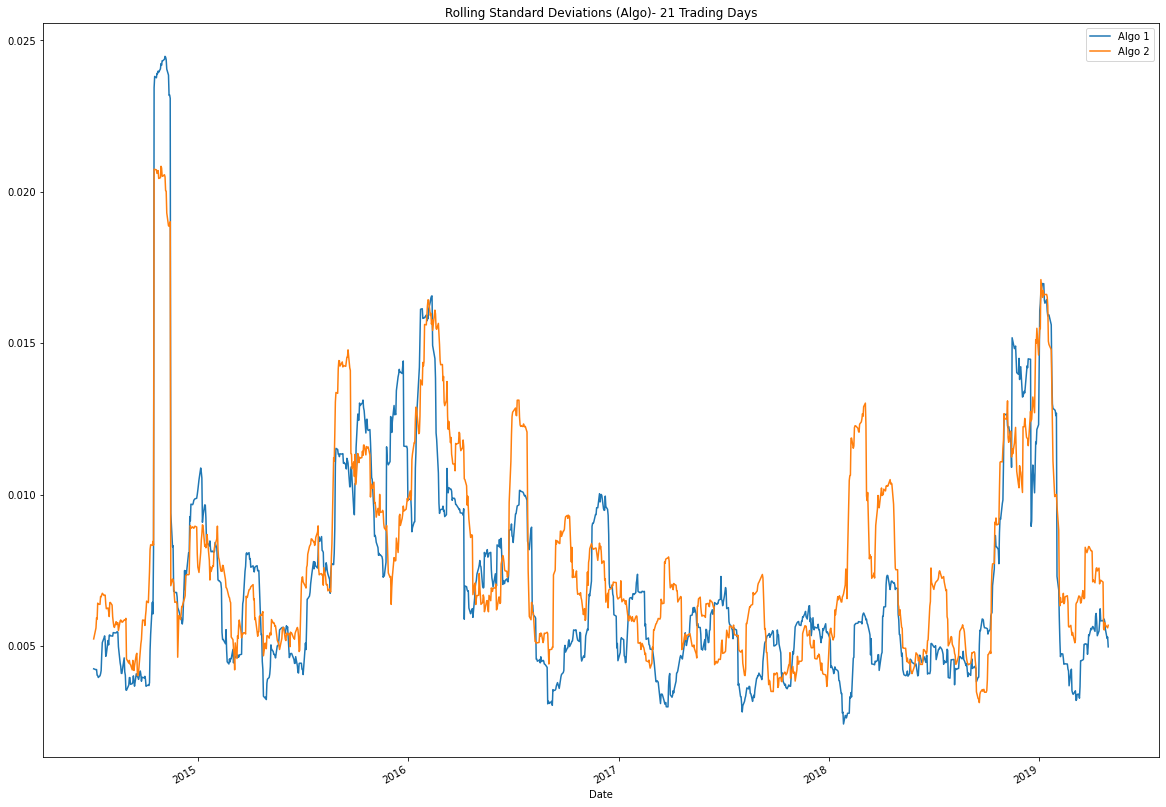

In [84]:
# Calculate the rolling standard deviation for algo portfolio using a 21-day window
algo_std21 = algo_df.rolling(21).std()
algo_std21.plot(title='Rolling Standard Deviations (Algo)- 21 Trading Days', figsize=(20,15))

<AxesSubplot:title={'center':'Rolling Standard Deviations (S&P500)- 21 Trading Days'}, xlabel='Date'>

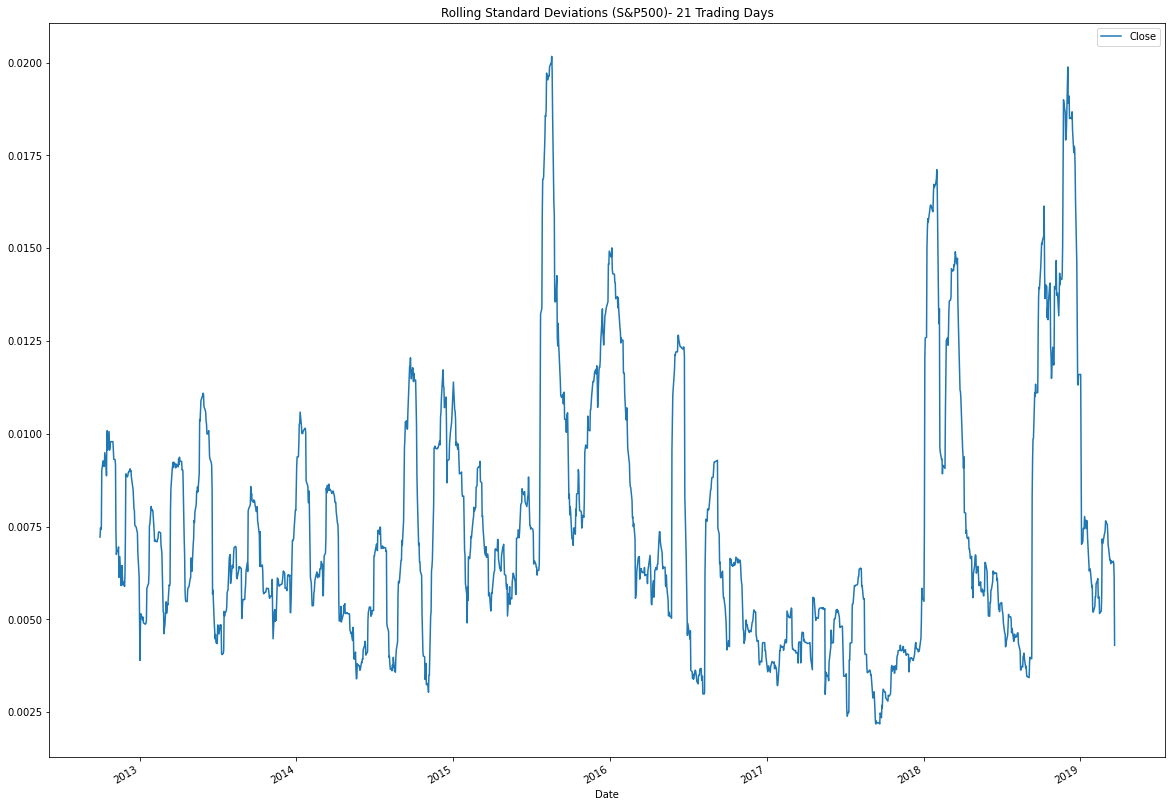

In [85]:
# Calculate the rolling standard deviation for S&P500 portfolio using a 21-day window
sp500_std21 = sp500_df.rolling(21).std()
sp500_std21.plot(title='Rolling Standard Deviations (S&P500)- 21 Trading Days', figsize=(20,15))

<AxesSubplot:title={'center':'Rolling Standard Deviations (Combined)- 21 Trading Days'}, xlabel='Date'>

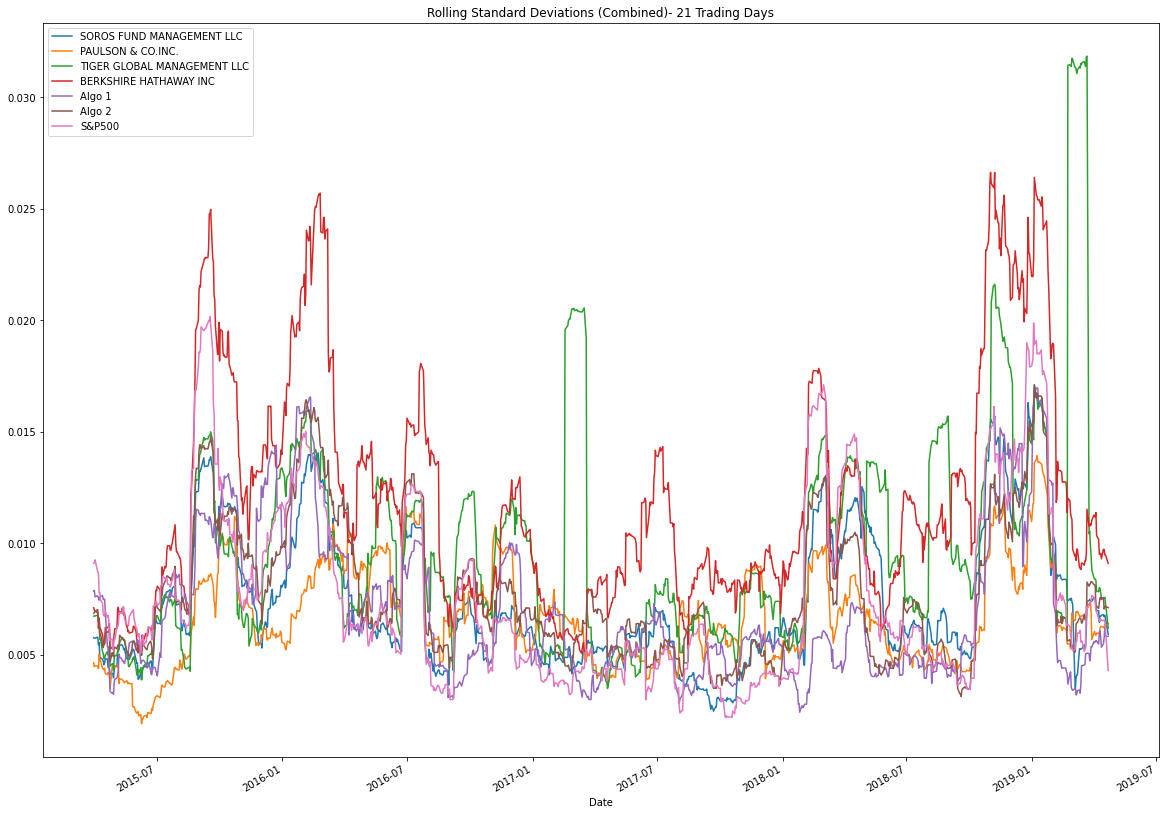

In [86]:
# Calculate the rolling standard deviation for combined portfolios using a 21-day window
rolling_std21 = merged_portfolio_df.rolling(21).std()
rolling_std21.plot(title='Rolling Standard Deviations (Combined)- 21 Trading Days', figsize=(20,15))

In [87]:
# Calculate & Display the correlation matrix
correlation = merged_portfolio_df.corr()
display(correlation)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [88]:
# Calculate the correlation between each portfolio to determine which portfolios may mimick the S&P 500
# sp500_df.corrwith(sp500_df, axis=0, drop=False, method='pearson')

In [89]:
# sp500_df.corrwith(algo_df, axis=0, drop=False, method='pearson')

In [90]:
# sp500_df.corrwith(whale_df, axis=0, drop=False, method='pearson')

In [91]:
# Calculate and Plot Beta for a chosen portfolio and the S&P 500. Calculate and plot the 60-day rolling beta between it and the S&P 500


# Calculate covariance of a single portfolio


# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


In [92]:
# An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. 
# Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as the metric of interest. Use `ewm` to calculate the rolling window
# ex_wt_avg=merged_portfolio_df.ewm
# display (ex_wt_avg)

<bound method NDFrame.ewm of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03             

In [93]:
# Calculate Sharpe Ratio (Each Portfolio): Reference Eq. From 'Risky Business' 03-Pandas-03 Activities, 17-Stu
sharpe_ratios = (merged_portfolio_df.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P500                        -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

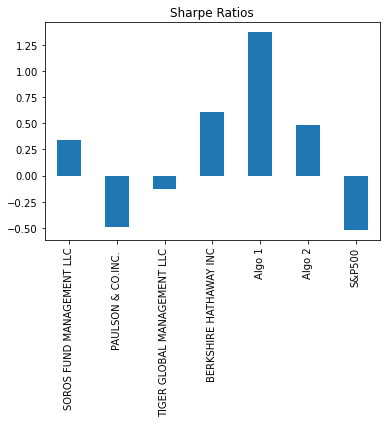

In [94]:
# Plot Sharpe Ratio
sharpe_ratios.plot.bar(title='Sharpe Ratios')

In [95]:
# Averaging sharpe ratios
# harold_sharpe_avg = harold_sharpe_ratios.mean()
# my_sharpe_avg = my_sharpe_ratios.mean()

# print("Harold's sharpe ratio average:", harold_sharpe_avg)
# print("My sharpe ratio average:", my_sharpe_avg)



In [96]:
# Use comparison operator to determine if Algo strategies outperform S&P500 (True or False)
# algo1_sharpe_ratio > sp500_sharpe_ratio
# algo2_sharpe_ratio > sp500_sharpe_ratio

# Use comparison operator to determine if Algo strategies outperform Whale portfolios (True or False)
# algo1_sharpe_ratio > whale_sharpe_ratio
# algo2_sharpe_ratio > whale_sharpe_ratio

In [97]:
# Monte Carlo Simulation-For Best Portfolio Combination
import matplotlib.pyplot as plt
%matplotlib notebook

log_returns = np.log(merged_portfolio_df/merged_portfolio_df.shift())


C:\Users\orich\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\orich\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [98]:
n = 1000
 
weights = np.zeros((n, 7))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n) 

In [99]:
for i in range(n):
    weight = np.random.random(7)
    weight /= weight.sum()
    weights[i] = weight 

In [100]:
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i] 
    

In [105]:
# Efficient Frontier Visualizer
 
fig, ax= plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Expected Return')